In [27]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
def tablepd(table):
    rows = table.findAll("tr")
    columns=list(range(len(rows[0])))
    df = pd.DataFrame(columns=columns)
    for i in range(len(rows)):
        tds = rows[i].find_all('td')
        if len(tds) == len(columns):
            values = [ td.text.replace('\n', '').replace('\xa0', ' ') for td in tds ]
            df = df.append(pd.Series(values, index=columns), ignore_index= True)
    
    return df

In [9]:
url='https://npb.jp/bis/2023/stats/bat_p.html'
html = urlopen(url)
soup = BeautifulSoup(html, "html.parser")
table = soup.findAll("table")[0]

In [6]:
df=tablepd(table)

In [19]:
import pandas as pd

url = 'https://npb.jp/bis/2023/stats/bat_p.html'
dfs = pd.read_html(url)

In [20]:
columns = ['no','player','team','avg','game','pa','ab','r','h','2b','3b','hr','tb','rbi','sb','cs','sac','sf','bb','ibb','db','so','gidp','slg','obp']

df = dfs[0]
df.drop(df.index[[0, 1]],inplace=True)
df.columns=columns

In [24]:
columns = ['no','player','team','avg','game','pa','ab','r','h','2b','3b','hr','tb','rbi','sb','cs','sac','sf','bb','ibb','db','so','gidp','slg','obp']
batstats = pd.DataFrame(columns=columns)

for y in range(10):
    year = 2014+y
    url='https://npb.jp/bis/{}/stats/bat_{}.html'.format(year,'c')
    # print(url)
    dfs = pd.read_html(url)
    df = dfs[0]
    df.drop(df.index[[0, 1]],inplace=True)
    df.columns=columns
    batstats = pd.concat([batstats, df], axis=0)

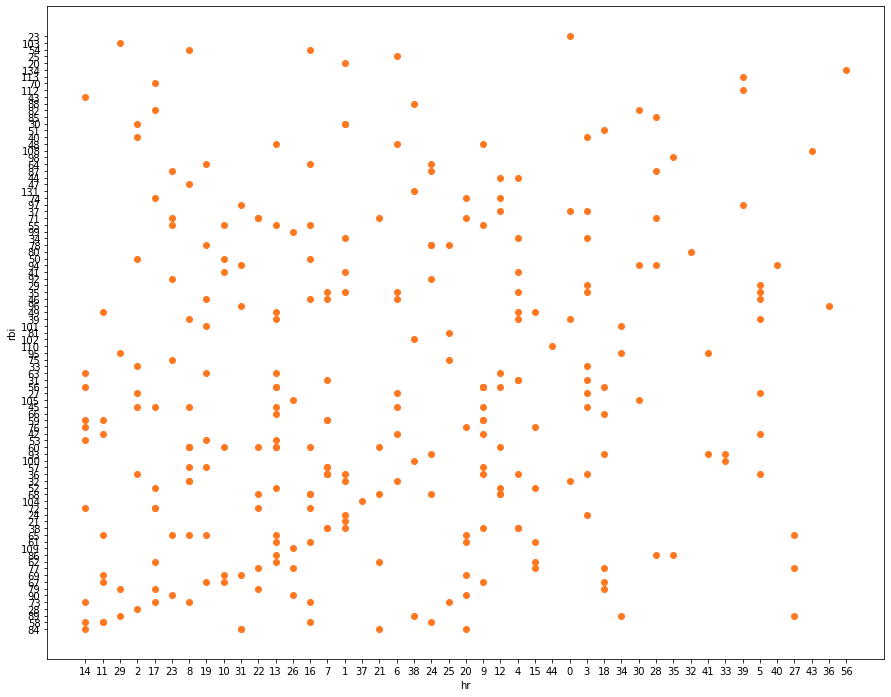

In [28]:
# プロット
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, xlabel='hr', ylabel='rbi')

ax.scatter(batstats['hr'], batstats['rbi'], c='#FF7820')

In [29]:
batstats.dtypes

no        object
player    object
team      object
avg       object
game      object
pa        object
ab        object
r         object
h         object
2b        object
3b        object
hr        object
tb        object
rbi       object
sb        object
cs        object
sac       object
sf        object
bb        object
ibb       object
db        object
so        object
gidp      object
slg       object
obp       object
dtype: object